Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv
      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  

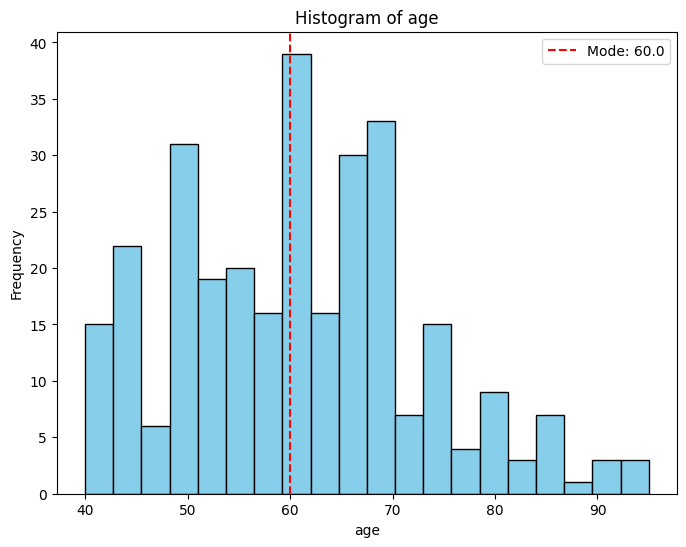

Діапазон для ознаки 'age': [40.0, 95.0]
Найбільша кількість спостережень біля значення: 60.0


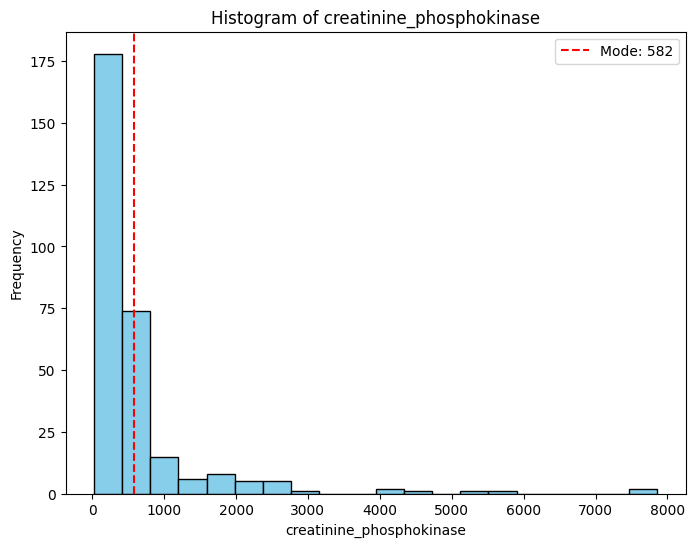

Діапазон для ознаки 'creatinine_phosphokinase': [23, 7861]
Найбільша кількість спостережень біля значення: 582


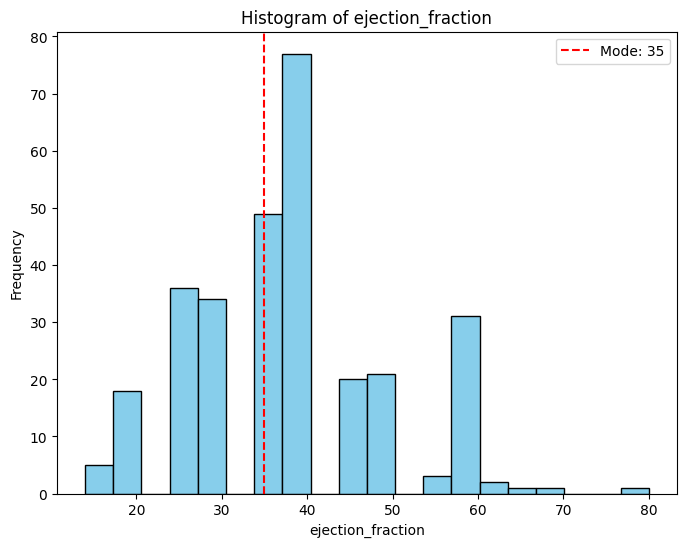

Діапазон для ознаки 'ejection_fraction': [14, 80]
Найбільша кількість спостережень біля значення: 35


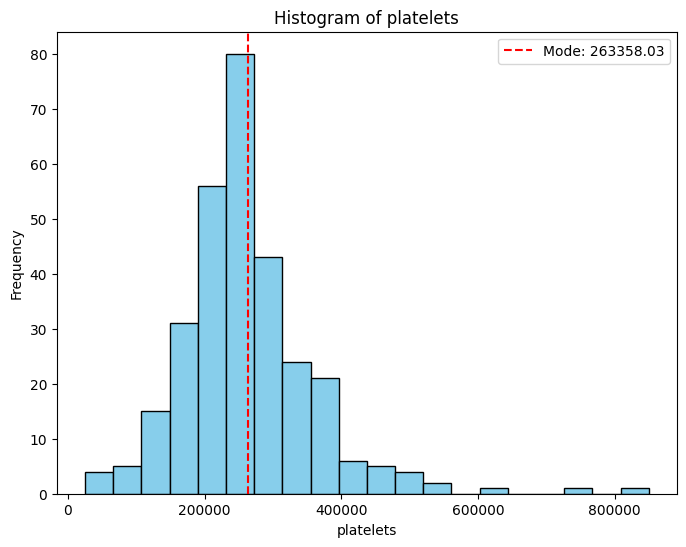

Діапазон для ознаки 'platelets': [25100.0, 850000.0]
Найбільша кількість спостережень біля значення: 263358.03


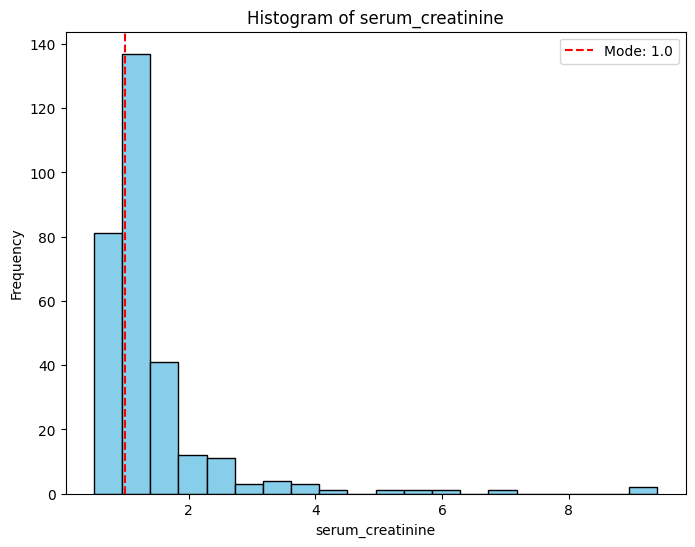

Діапазон для ознаки 'serum_creatinine': [0.5, 9.4]
Найбільша кількість спостережень біля значення: 1.0


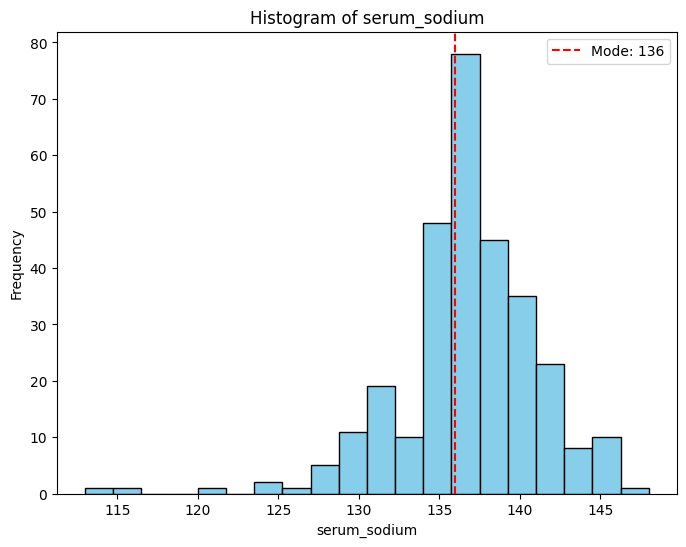

Діапазон для ознаки 'serum_sodium': [113, 148]
Найбільша кількість спостережень біля значення: 136

Двовимірний масив NumPy:
[[7.5000000e+01 5.8200000e+02 2.0000000e+01 2.6500000e+05 1.9000000e+00
  1.3000000e+02]
 [5.5000000e+01 7.8610000e+03 3.8000000e+01 2.6335803e+05 1.1000000e+00
  1.3600000e+02]
 [6.5000000e+01 1.4600000e+02 2.0000000e+01 1.6200000e+05 1.3000000e+00
  1.2900000e+02]
 ...
 [4.5000000e+01 2.0600000e+03 6.0000000e+01 7.4200000e+05 8.0000000e-01
  1.3800000e+02]
 [4.5000000e+01 2.4130000e+03 3.8000000e+01 1.4000000e+05 1.4000000e+00
  1.4000000e+02]
 [5.0000000e+01 1.9600000e+02 4.5000000e+01 3.9500000e+05 1.6000000e+00
  1.3600000e+02]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()


# Завантаження даних у датафрейм
df = pd.read_csv(io.BytesIO(uploaded['heart_failure_clinical_records_dataset.csv']))
# Вилучення бінарних ознак та ознаки "час"
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_filtered = df.drop(columns=binary_features)
df_filtered = df_filtered.drop(columns=['time'])
print(df_filtered)

# Побудова гістограм для кожної ознаки та визначення діапазонів та моди
for column in df_filtered.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_filtered[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

#На підставі гістограм визначте діапазони значень для кожної ознаки, а також біля якого значення лежить найбільша кількість спостережень
    mode_value = df_filtered[column].mode()[0]
    min_value = df_filtered[column].min()
    max_value = df_filtered[column].max()
    plt.axvline(x=mode_value, color='red', linestyle='--', label=f'Mode: {mode_value}')
    plt.legend()
    plt.show()

    print(f"Діапазон для ознаки '{column}': [{min_value}, {max_value}]")
    print(f"Найбільша кількість спостережень біля значення: {mode_value}")

numpy_array = df_filtered.to_numpy()
print("\nДвовимірний масив NumPy:")
print(numpy_array)


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (2).csv


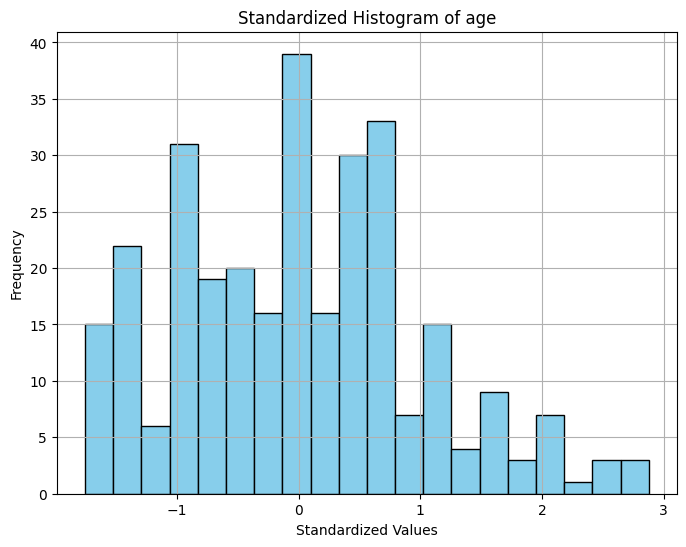

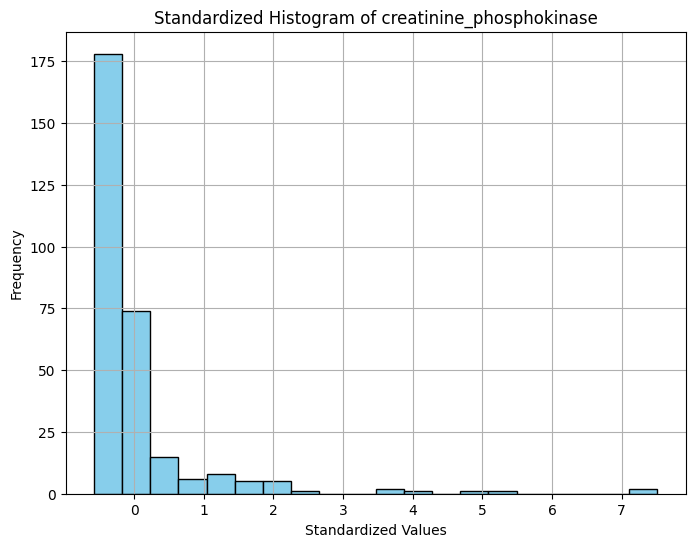

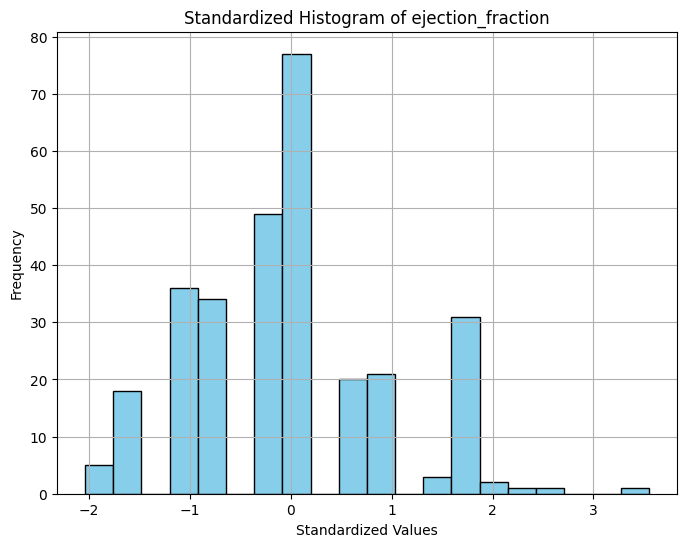

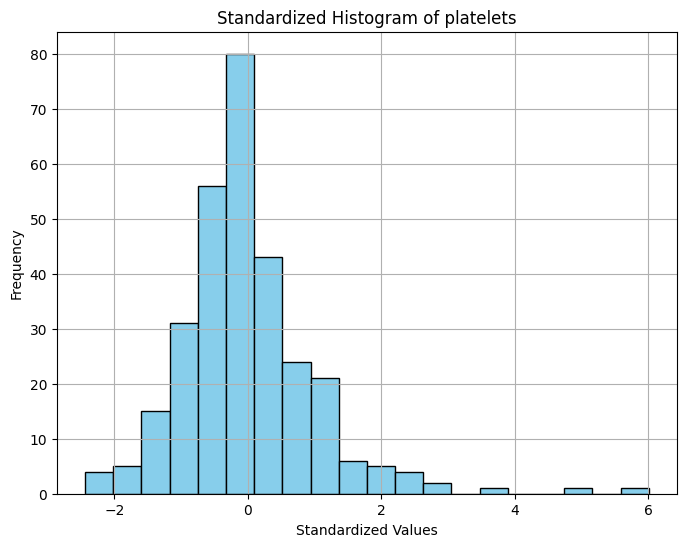

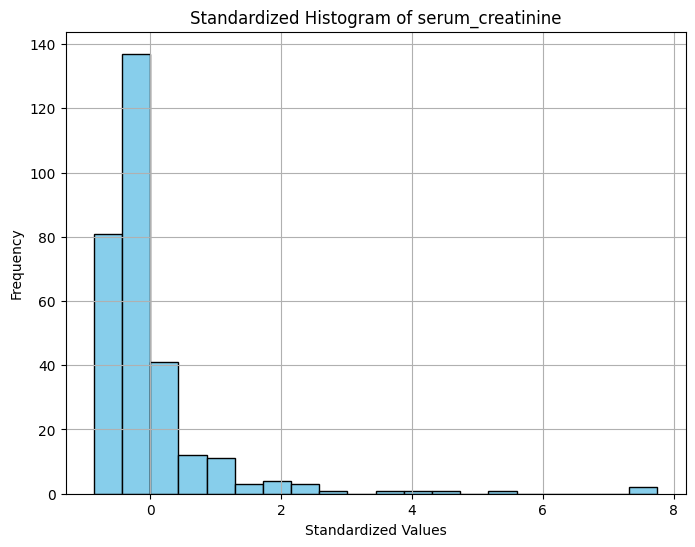

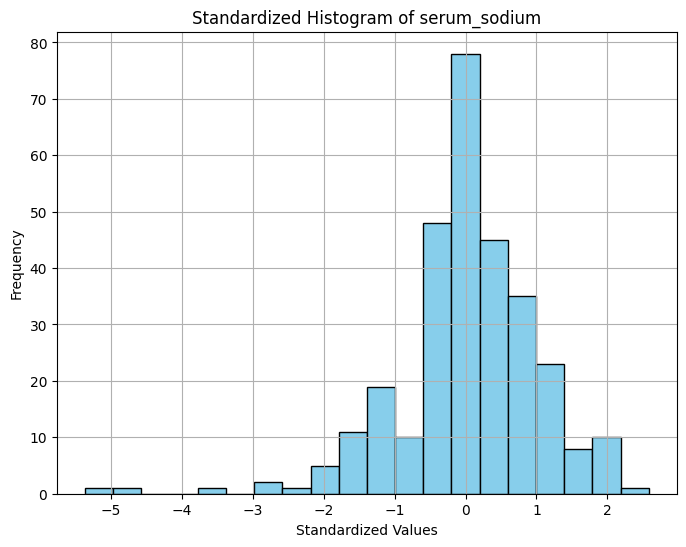

До стандартизації:
              age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium  
count         299.00000    299.000000  
mean            1.39388    136.625418  
std             1.03451      4.412477  
min             0.50000    113.000000  
25%             0.90000    134.000000  
50%        

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_filtered = df.drop(columns=binary_features)
df_filtered = df_filtered.drop(columns=['time'])

# Налаштування стандартизації за допомогою StandardScaler
scaler = StandardScaler()
scaler.fit(df_filtered)

# Стандартизація всіх даних
scaled_data = scaler.transform(df_filtered)

# Побудова гістограм для кожної ознаки стандартизованих даних
for i, column in enumerate(df_filtered.columns):
    plt.figure(figsize=(8, 6))
    plt.hist(scaled_data[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Standardized Histogram of {column}')
    plt.xlabel('Standardized Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
# Порівняння даних до та після стандартизації
print("До стандартизації:")
print(df_filtered.describe())
print("\nПісля стандартизації:")
print(pd.DataFrame(scaled_data, columns=df_filtered.columns).describe())

# Математичне очікування та СКО до стандартизації
mean_before = df_filtered.mean()
std_before = df_filtered.std()

# Математичне очікування та СКО після стандартизації
mean_after = scaler.mean_
std_after = np.sqrt(scaler.var_)

print("Математичне очікування та СКО до стандартизації:")
print(pd.DataFrame({'Mean Before': mean_before, 'Std Before': std_before}))

print("\nМатематичне очікування та СКО після стандартизації:")
print(pd.DataFrame({'Mean After': mean_after, 'Std After': std_after}))

# Порівняння значень формул з полями mean_ і var_
print("Порівняння значень формул з полями mean_ і var_:")
for i, column in enumerate(df_filtered.columns):
    mean_formula = mean_before[i]
    std_formula = std_before[i]
    mean_scaler = scaler.mean_[i]
    std_scaler = np.sqrt(scaler.var_[i])
    print(f"Ознака: {column}")
    print(f"Формула: (x - {mean_formula}) / {std_formula}")
    print(f"Scikit-learn: (x - {mean_scaler}) / {std_scaler}")
    print()

# Налаштування стандартизації для всіх даних
scaler_all_data = StandardScaler()
scaler_all_data.fit(df_filtered)

print("Порівняння налаштувань стандартизації:")
print("Для перших 150 спостережень:")
print(scaler.mean_)
print(scaler.var_)
print("\nДля всіх даних:")
print(scaler_all_data.mean_)
print(scaler_all_data.var_)


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (3).csv
Приведені дані:
[[0.63636364 0.07131921 0.09090909 0.29082313 0.15730337 0.48571429]
 [0.27272727 1.         0.36363636 0.28883262 0.06741573 0.65714286]
 [0.45454545 0.01569278 0.09090909 0.16595951 0.08988764 0.45714286]
 ...
 [0.09090909 0.25988773 0.6969697  0.86907504 0.03370787 0.71428571]
 [0.09090909 0.30492473 0.36363636 0.13928961 0.1011236  0.77142857]
 [0.18181818 0.02207196 0.46969697 0.44841799 0.12359551 0.65714286]]


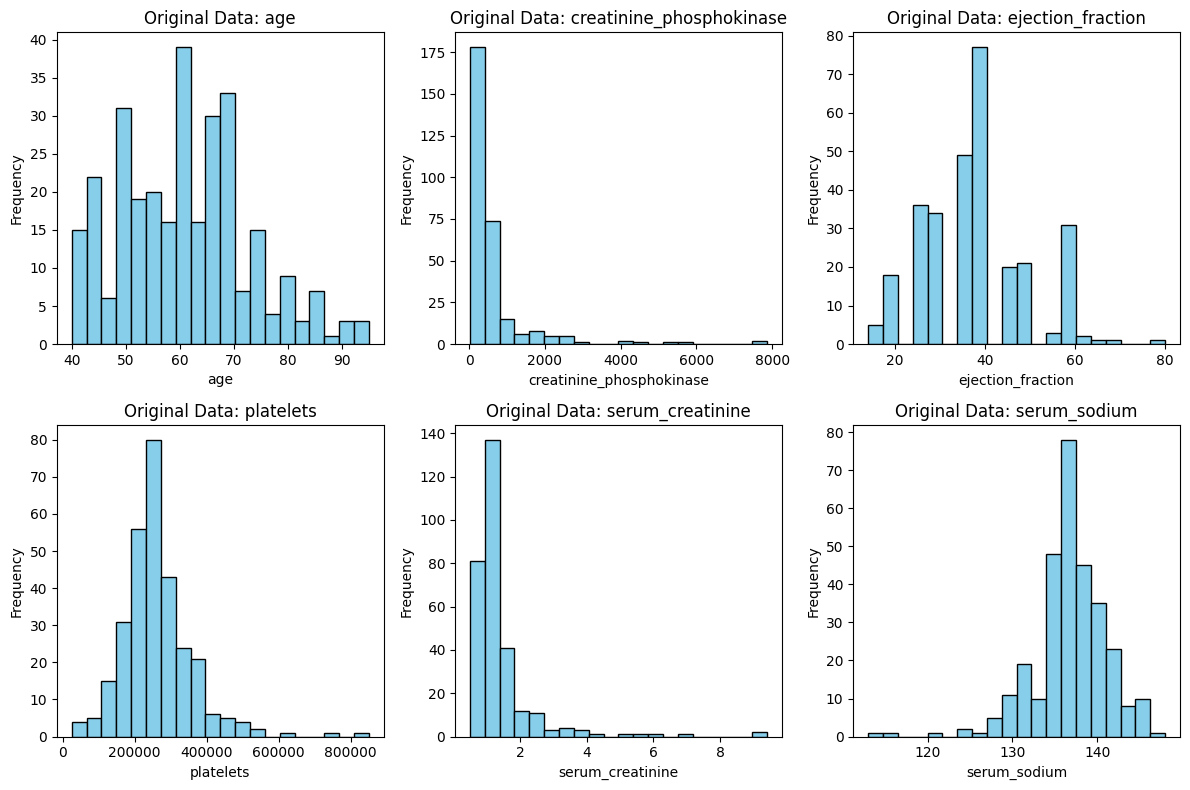

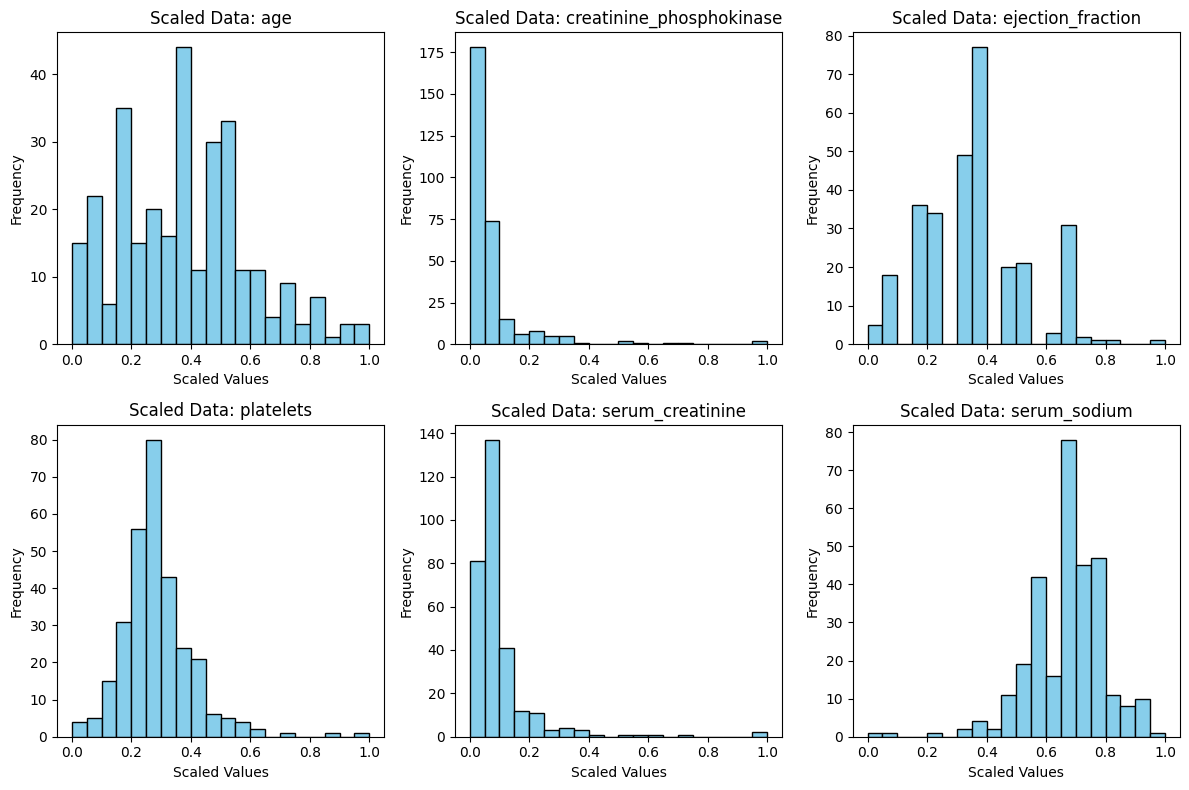

Мінімальні значення для кожної ознаки:
[4.00e+01 2.30e+01 1.40e+01 2.51e+04 5.00e-01 1.13e+02]

Максимальні значення для кожної ознаки:
[9.500e+01 7.861e+03 8.000e+01 8.500e+05 9.400e+00 1.480e+02]


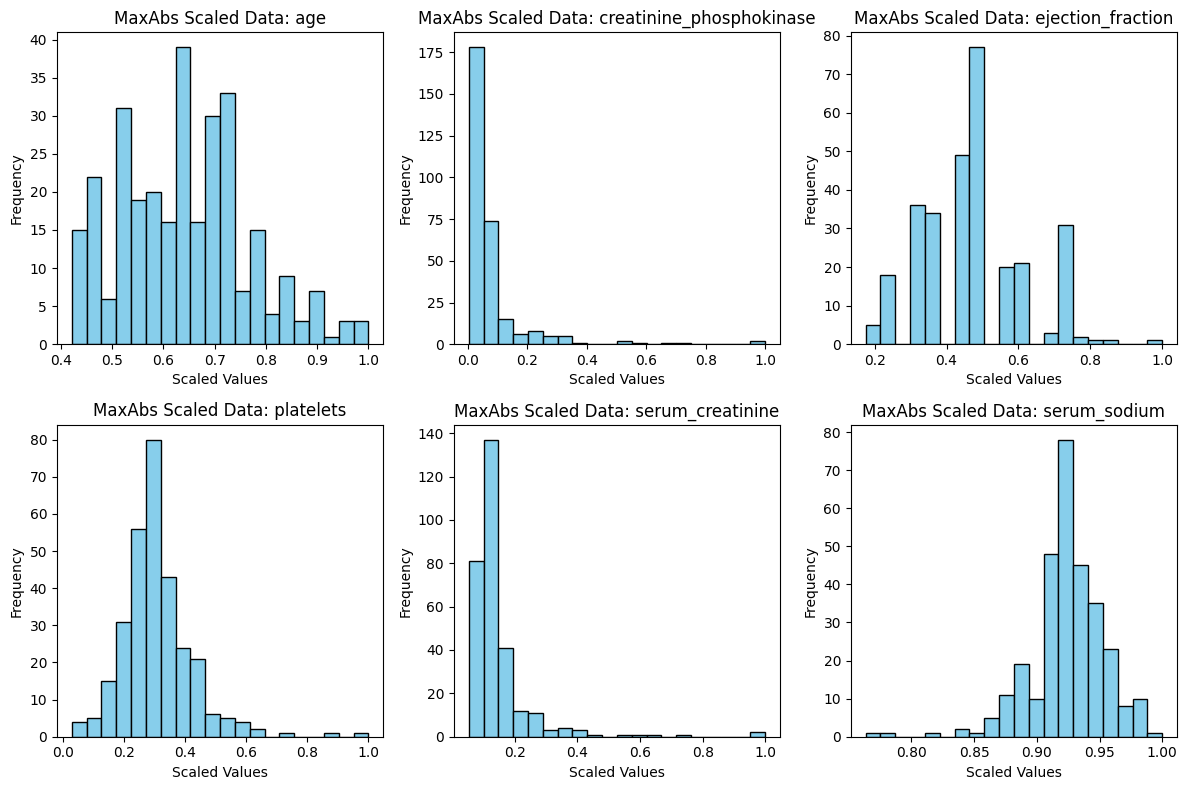

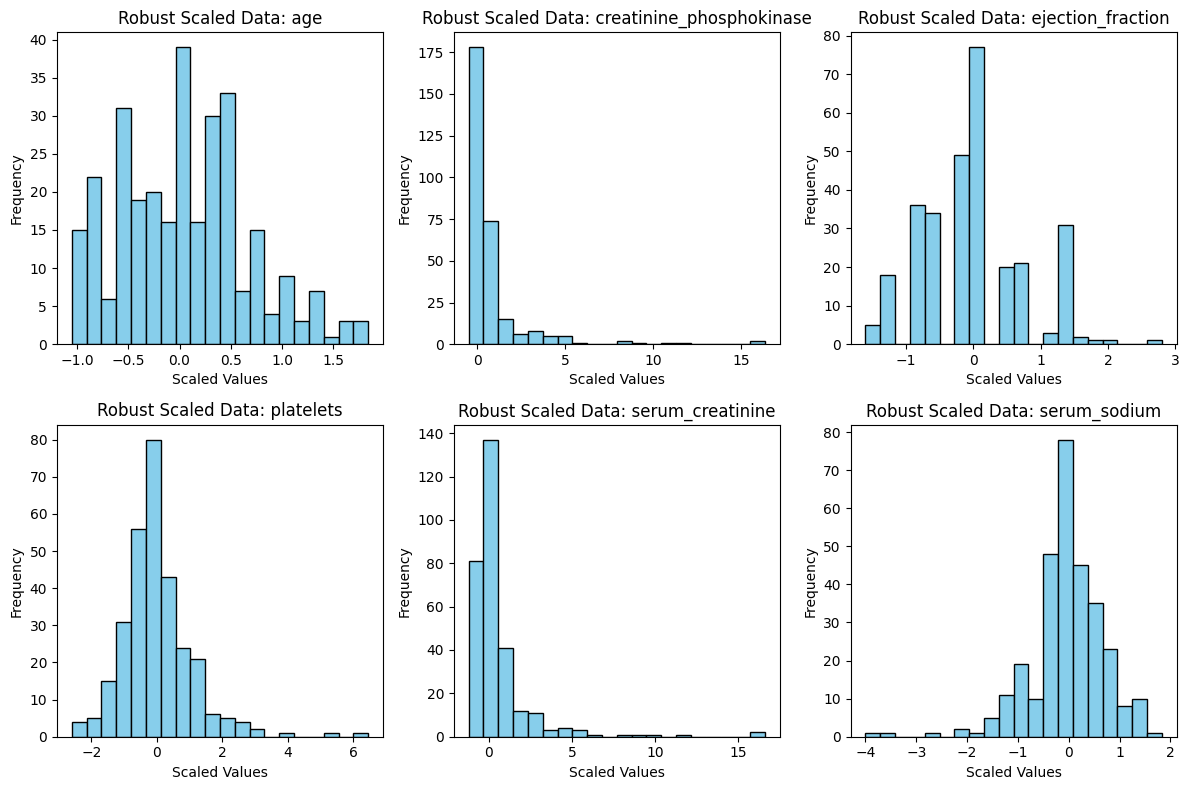

Приведені дані до діапазону [-5, 10]:
          age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    4.545455                 -3.930212          -3.636364  -0.637653   
1   -0.909091                 10.000000           0.454545  -0.667511   
2    1.818182                 -4.764608          -3.636364  -2.510607   
3   -2.272727                 -4.831590          -3.636364  -1.637774   
4    1.818182                 -4.737816          -3.636364   0.489756   
..        ...                       ...                ...        ...   
294  1.000000                 -4.927277           0.454545  -2.637896   
295 -0.909091                 -1.560985           0.454545  -0.546733   
296 -3.636364                 -1.101684           5.454545   8.036126   
297 -3.636364                 -0.426129           0.454545  -2.910656   
298 -2.272727                 -4.668921           2.045455   1.726270   

     serum_creatinine  serum_sodium  
0           -2.640449      2.285714  
1        

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler, RobustScaler
import io
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_filtered = df.drop(columns=binary_features)
df_filtered = df_filtered.drop(columns=['time'])

scaler = MinMaxScaler()
scaler.fit(df_filtered)
scaled_data = scaler.transform(df_filtered)

print("Приведені дані:")
print(scaled_data)


plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df_filtered[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Original Data: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(scaled_data[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Scaled Data: {column}')
    plt.xlabel('Scaled Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

min_values = scaler.data_min_
max_values = scaler.data_max_

print("Мінімальні значення для кожної ознаки:")
print(min_values)
print("\nМаксимальні значення для кожної ознаки:")
print(max_values)

max_abs_scaler = MaxAbsScaler()
max_abs_scaled_data = max_abs_scaler.fit_transform(df_filtered)


plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(max_abs_scaled_data[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'MaxAbs Scaled Data: {column}')
    plt.xlabel('Scaled Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(df_filtered)


plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(robust_scaled_data[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Robust Scaled Data: {column}')
    plt.xlabel('Scaled Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Функція для приведення усіх даних до діапазону [-5, 10]
def scale_to_range(data, min_range, max_range):
    scaled_data = ((data - data.min()) / (data.max() - data.min())) * (max_range - min_range) + min_range
    return scaled_data


scaled_to_range_data = scale_to_range(df_filtered, -5, 10)
print("Приведені дані до діапазону [-5, 10]:")
print(scaled_to_range_data)




Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (4).csv
Дані після приведення до рівномірного розподілу:
[[0.88383838 0.70707071 0.04545455 0.5959596  0.87878788 0.05555556]
 [0.34343434 1.         0.54545455 0.55050505 0.48989899 0.39393939]
 [0.66161616 0.33557047 0.04545455 0.11557789 0.6969697  0.04001177]
 ...
 [0.08585859 0.94408081 0.93434343 0.99644772 0.12121212 0.63131313]
 [0.08585859 0.95972912 0.54545455 0.06793077 0.74747475 0.8030303 ]
 [0.2020202  0.42253521 0.76767677 0.92961086 0.78787879 0.39393939]]


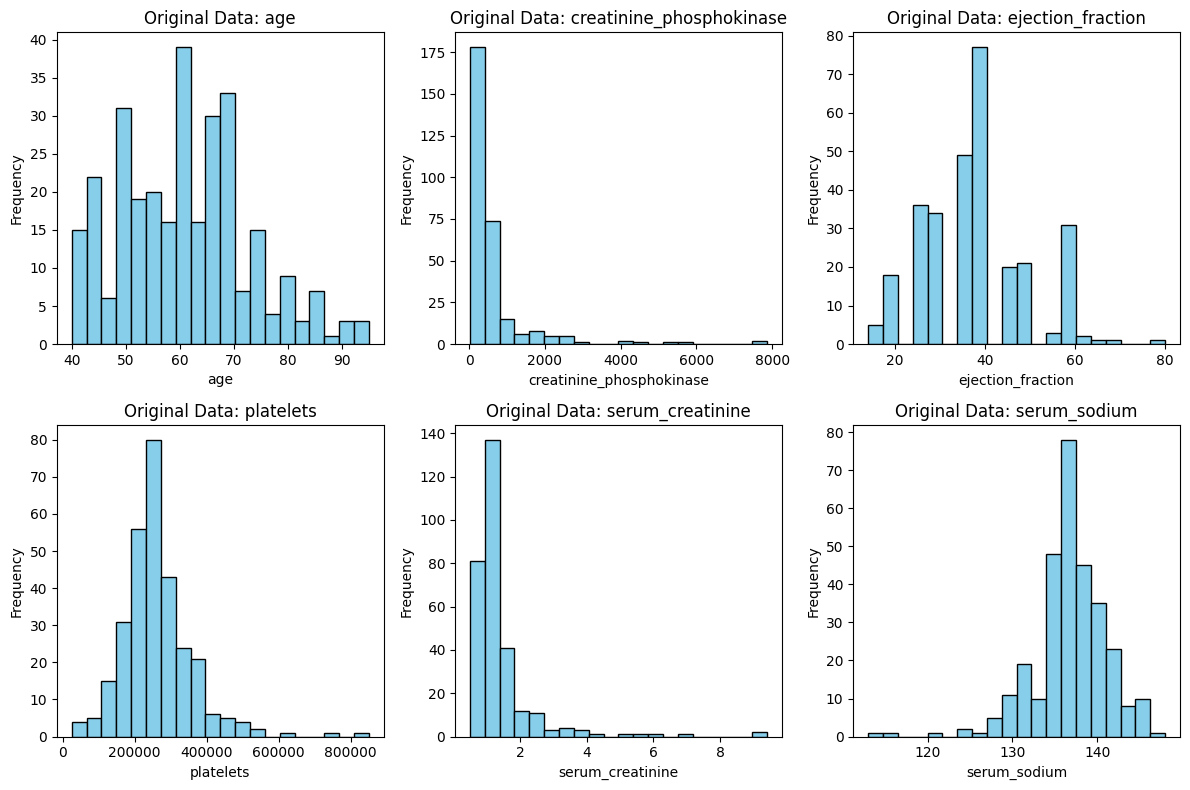

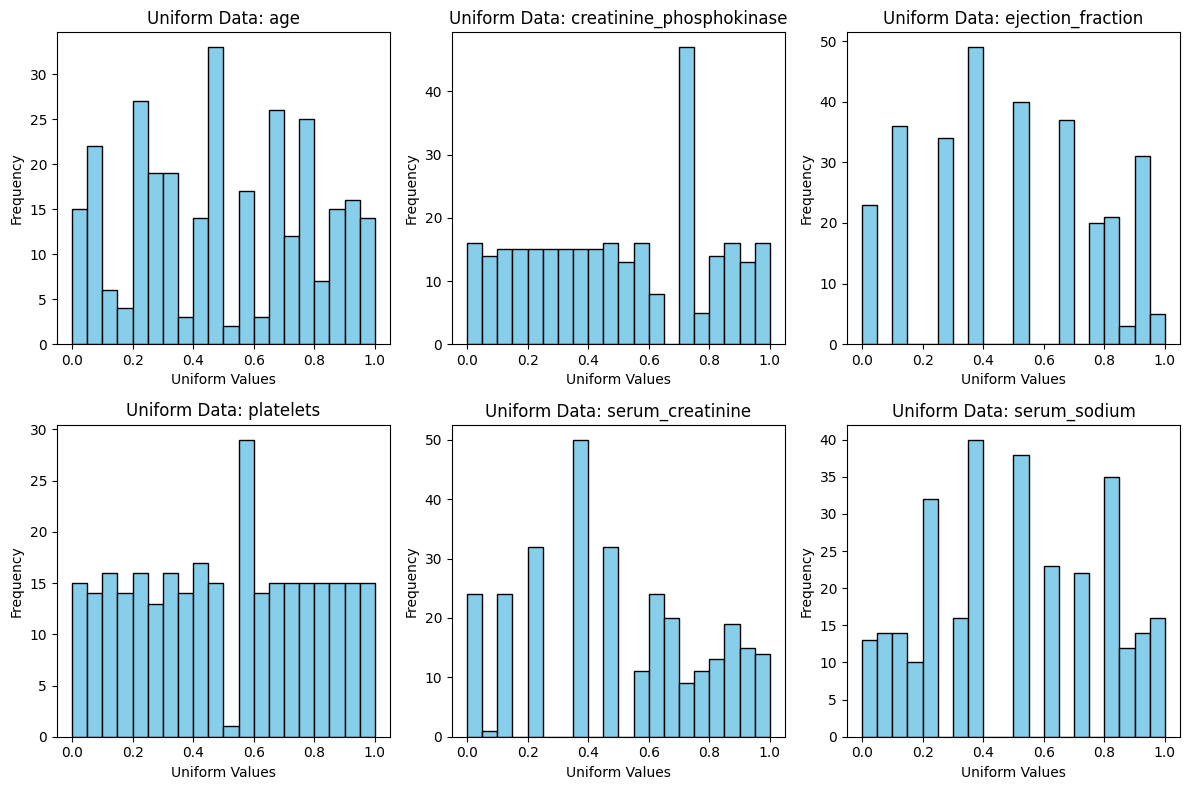

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
import io
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')


binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_filtered = df.drop(columns=binary_features)
df_filtered = df_filtered.drop(columns=['time'])

# Налаштування приведення даних до рівномірного розподілу за допомогою QuantileTransformer
n_quantiles = 100  # Значення параметра n_quantiles
scaler = QuantileTransformer(n_quantiles=n_quantiles, random_state=0, output_distribution='uniform')
uniform_data = scaler.fit_transform(df_filtered)

# Виведення приведених даних
print("Дані після приведення до рівномірного розподілу:")
print(uniform_data)

# Побудова гістограм для оригінальних даних
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df_filtered[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Original Data: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Побудова гістограм для даних після приведення до рівномірного розподілу
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(uniform_data[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Uniform Data: {column}')
    plt.xlabel('Uniform Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
import io
from google.colab import files
uploaded = files.upload()

# Завантаження даних у датафрейм
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Вилучення бінарних ознак та ознаки "час"
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_filtered = df.drop(columns=binary_features)
df_filtered = df_filtered.drop(columns=['time'])

# Налаштування приведення даних до нормального розподілу за допомогою QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
normal_data = scaler.fit_transform(df_filtered)

# Друк приведених даних
print("Дані після приведення до нормального розподілу:")
print(normal_data)

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (5).csv
Дані після приведення до нормального розподілу:
[[ 1.1878327   0.54770771 -1.69222004  0.24640449  1.15443433 -1.58005636]
 [-0.39712516  5.19933758  0.10533829  0.11803457 -0.02103031 -0.25943191]
 [ 0.41081519 -0.42458265 -1.69222004 -1.19639199  0.51861844 -1.76728083]
 ...
 [-1.33704468  1.61007012  1.49763469  2.71083461 -1.16266255  0.33416503]
 [-1.33704468  1.74757924  0.10533829 -1.51067026  0.66396704  0.84883492]
 [-0.84282047 -0.19897554  0.72280669  1.47230106  0.79575492 -0.25943191]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (299). n_quantiles is set to n_samples.
  warnings.warn(


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (6).csv


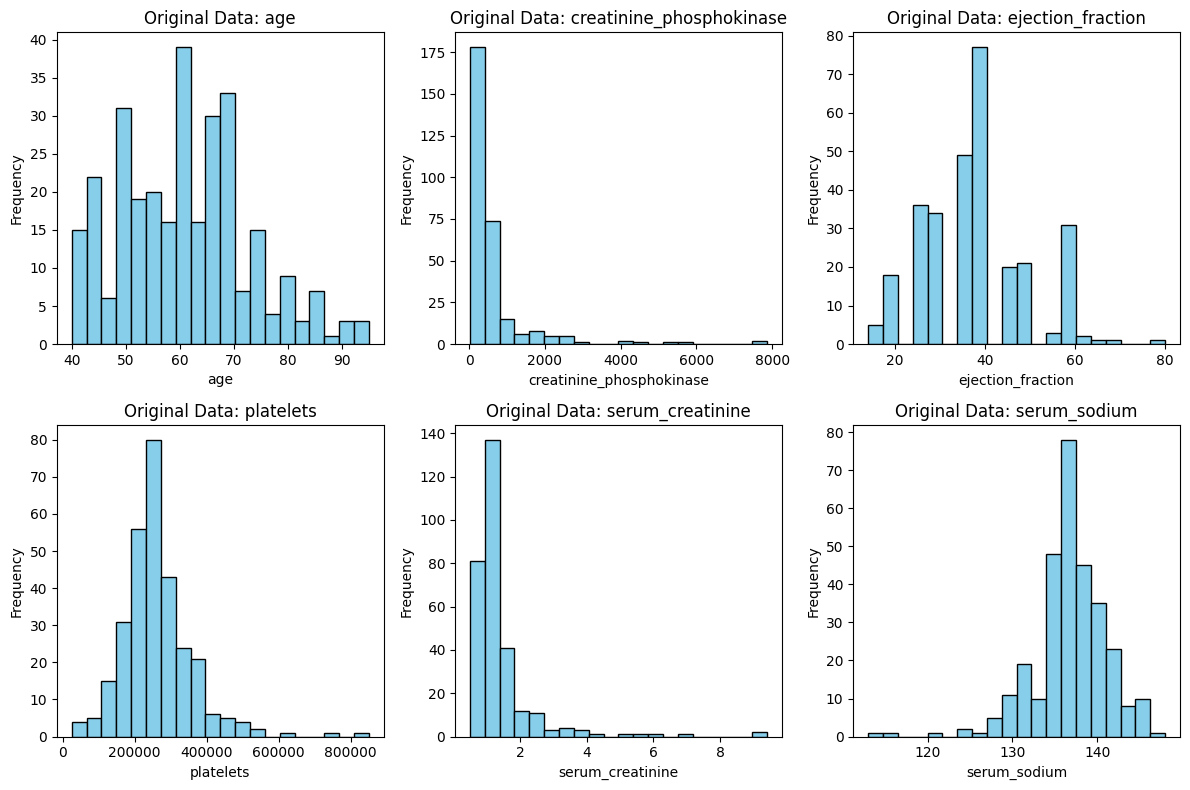

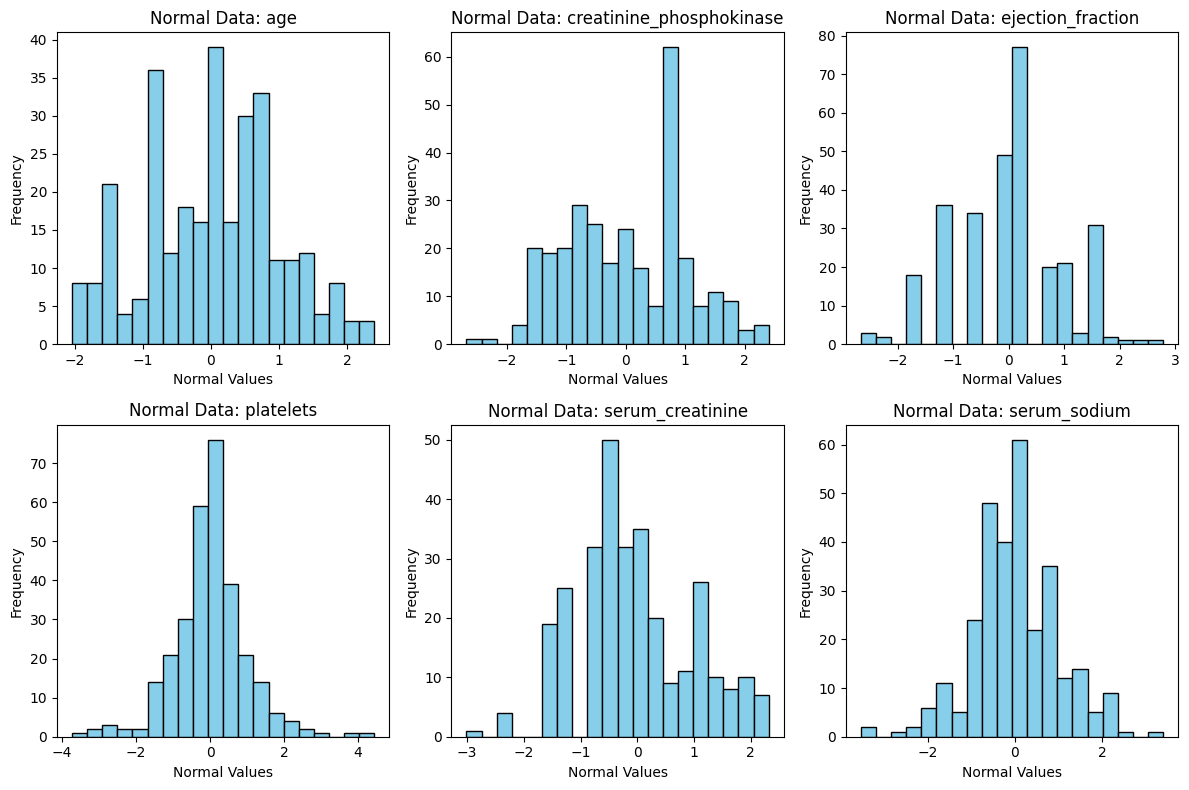

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import io
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_filtered = df.drop(columns=binary_features)
df_filtered = df_filtered.drop(columns=['time'])


scaler = PowerTransformer()
normal_data = scaler.fit_transform(df_filtered)

# Побудова гістограм для оригінальних даних
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df_filtered[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Original Data: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Побудова гістограм для даних після приведення до нормального розподілу
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(normal_data[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Normal Data: {column}')
    plt.xlabel('Normal Values')
    plt.ylabel('Frequency')
plt.tight_layout()

plt.show()


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (7).csv

Діапазони кожного інтервалу для ознаки 'age':
Interval 1: 40.0 - 58.33333333333333
Interval 2: 58.33333333333333 - 76.66666666666666
Interval 3: 76.66666666666666 - 95.0

Діапазони кожного інтервалу для ознаки 'creatinine_phosphokinase':
Interval 1: 23.0 - 1982.5
Interval 2: 1982.5 - 3942.0
Interval 3: 3942.0 - 5901.5
Interval 4: 5901.5 - 7861.0

Діапазони кожного інтервалу для ознаки 'ejection_fraction':
Interval 1: 14.0 - 36.0
Interval 2: 36.0 - 58.0
Interval 3: 58.0 - 80.0

Діапазони кожного інтервалу для ознаки 'platelets':
Interval 1: 25100.0 - 107590.0
Interval 2: 107590.0 - 190080.0
Interval 3: 190080.0 - 272570.0
Interval 4: 272570.0 - 355060.0
Interval 5: 355060.0 - 437550.0
Interval 6: 437550.0 - 520040.0
Interval 7: 520040.0 - 602530.0
Interval 8: 602530.0 - 685020.0
Interval 9: 685020.0 - 767510.0
Interval 10: 767510.0 - 850000.0

Діапазони кожного інтервалу для ознаки 'seru

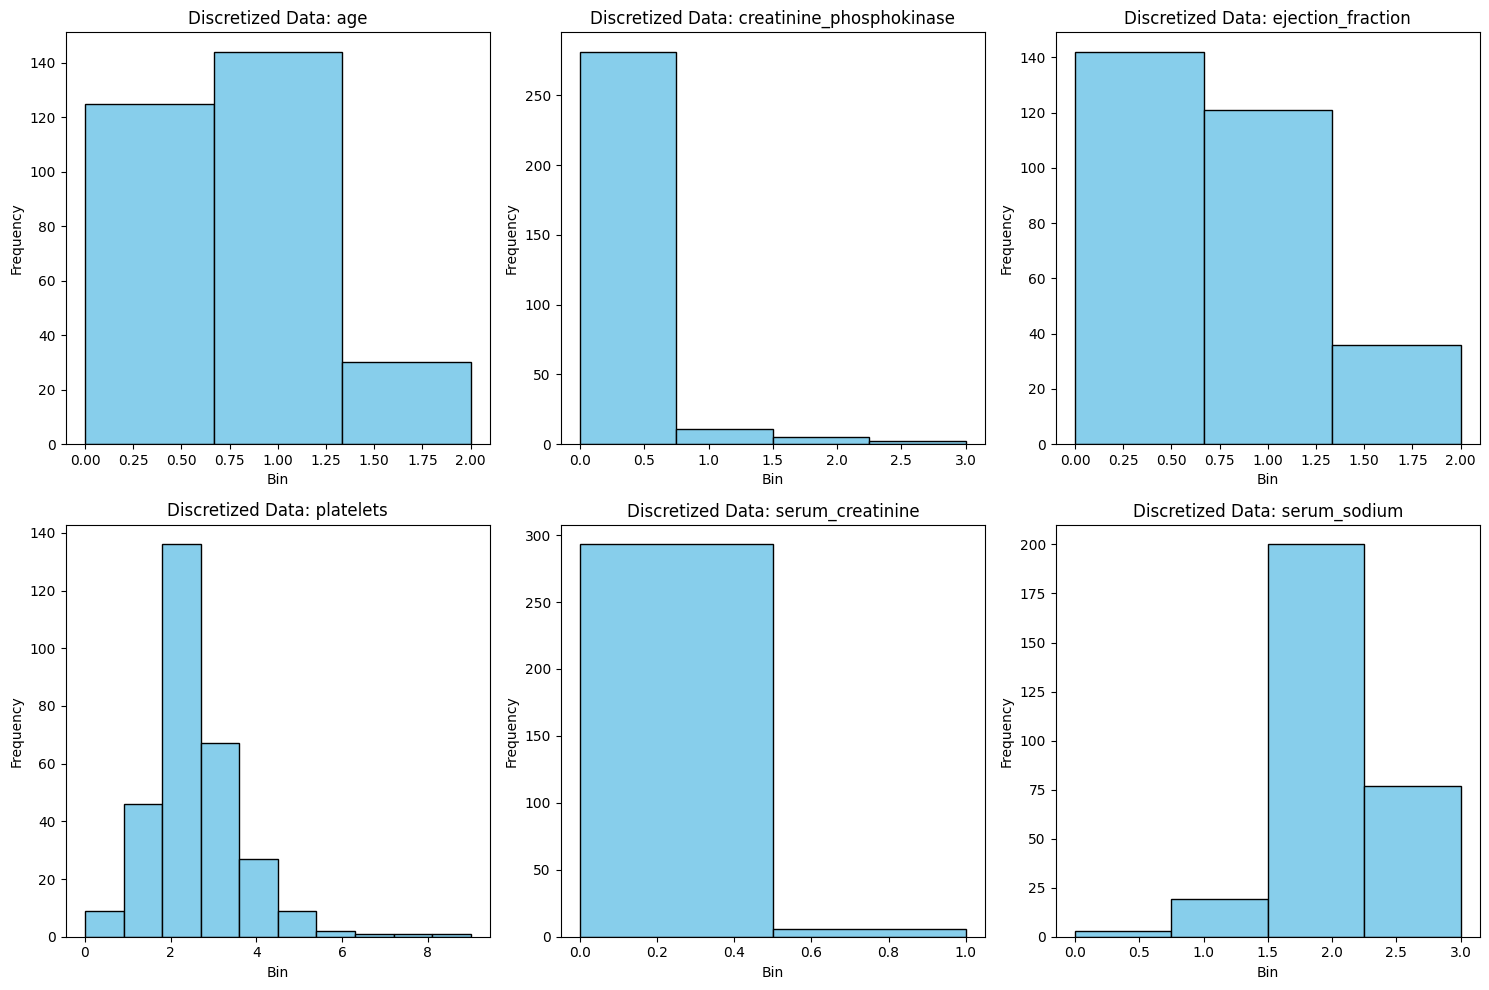

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()
from sklearn.preprocessing import KBinsDiscretizer

# Завантаження даних у датафрейм
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Створення об'єкта KBinsDiscretizer з вказаними кількостями діапазонів для кожної ознаки
discretizer = KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal', strategy='uniform')

# Вилучення потрібних ознак
selected_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
data_to_discretize = df[selected_features]

# Дискретизація даних
discretized_data = discretizer.fit_transform(data_to_discretize)

# Побудова гістограм для дискретизованих даних
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    plt.hist(discretized_data[:, i], bins=discretizer.n_bins_[i], color='skyblue', edgecolor='black')
    plt.title(f'Discretized Data: {column}')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')

    # Виведення діапазонів кожного інтервалу для поточної ознаки
    print(f"\nДіапазони кожного інтервалу для ознаки '{column}':")
    for j in range(discretizer.n_bins_[i]):
        print(f"Interval {j + 1}: {discretizer.bin_edges_[i][j]} - {discretizer.bin_edges_[i][j + 1]}")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

tips_df = pd.read_csv('tips.csv')


print("Перші 5 рядків датасету:")
print(tips_df.head())

print("\nТипи даних кожної ознаки:")
print(tips_df.dtypes)

# Кодування категоріальних ознак за допомогою Label Encoding або One-Hot Encoding
# Кодування категоріальної ознаки "sex" за допомогою Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
tips_df['sex_encoded'] = label_encoder.fit_transform(tips_df['sex'])

# Кодування категоріальної ознаки "day" за допомогою One-Hot Encoding
tips_df = pd.get_dummies(tips_df, columns=['day'], prefix='day')

# Бінаризація категоріальної ознаки "time"
tips_df['time_binary'] = tips_df['time'].apply(lambda x: 1 if x == 'Dinner' else 0)

# Нормалізація числових ознак за допомогою MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_features = ['total_bill', 'tip', 'size']
tips_df[numeric_features] = scaler.fit_transform(tips_df[numeric_features])

# Огляд зміненого датасету після кодування
print("\nОгляд зміненого датасету:")
print(tips_df.head())


Saving tips.csv to tips.csv
Перші 5 рядків датасету:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Типи даних кожної ознаки:
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

Огляд зміненого датасету:
   total_bill       tip     sex smoker    time  size  sex_encoded  day_Fri  \
0    0.291579  0.001111  Female     No  Dinner   0.2            0    False   
1    0.152283  0.073333    Male     No  Dinner   0.4            1    False   
2    0.375786  0.277778    Male     No  Dinner   0.4            1    False   
3    0.431713  0.256667    Male     No  Dinner   0.2            1    False   
4    0.4507